In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd           
import seaborn as sns        
import sklearn 

# Video Game Sales

Этот набор данных содержит список видеоигр с продажами более 100 000 копий, а также оценки критиков и пользователей.

Cтолбцы (признаки) имеют имена:

* `Name` - Название игры.  
* `Platform` - Платформа выпуска игр.    
* `Year_of_Release` - Год выхода игры.    
* `Genre` - Жанр игры.    
* `Publisher` - Издатель игры. 
* `NA_Sales` - Продажи в Северной Америке (в миллионах).
* `EU_Sales` - Продажи в Европе (в миллионах).  
* `JP_Sales` - Продажи в Японии (в миллионах).  
* `Other_Sales` - Продажи в остальном мире (в миллионах).  
* `Global_Sales` - Общий объем продаж по всему миру (в миллионах).  
* `Critic_Score` - общая оценка, составленная сотрудниками Metacritic.  
* `Critic_Count` - количество критиков, использованных при составлении оценки критиков.  
* `User_Score` - Оценка подписчиков Metacritic.  
* `User_Count` - Количество пользователей, которые дали оценку.  
* `Rating` - рейтинги ESRB (Entertainment Software Rating Board).    
  
  - «EC» («Early childhood») — «Для детей младшего возраста».  
  - «E» («Everyone») — «Для всех».  
      - Первоначально «K-A» («Kids to Adults»)
  - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».
  - «T» («Teen») — «Подросткам».
  - «M» («Mature») — «Для взрослых».
  - «AO» («Adults Only 18+») — «Только для взрослых».  
  - «RP» («Rating Pending») — «Рейтинг ожидается».
  
    
Задача: предсказать признак `Genre` по остальным признакам.

### Загрузка данных

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/g1tCommit/ML_Video_Game_Sales_/main/Video_Game_Sales_as_of_Jan_2017.csv')
df.shape

(17416, 15)

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [4]:
df.index

RangeIndex(start=0, stop=17416, step=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17408 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17415 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


Столбцы `Name`, `Genre`, `Rating`, `Platform`, `Publisher` содержат категориальные значения и имеют тип object. Заменим тип на специальный, предназначенный для хранения категориальных значений, кроме столбца `Name`, который можно удалить:

In [6]:
df['Genre'] = df['Genre'].astype('category')

In [7]:
df['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Fighting', 'Misc', 'Platform',
                  'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation',
                  'Sports', 'Strategy'],
                 ordered=False)

In [8]:
df['Rating'] = df['Rating'].astype('category')

In [9]:
df['Rating'].dtype

CategoricalDtype(categories=['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T'], ordered=False)

In [10]:
df['Platform'] = df['Platform'].astype('category')

In [11]:
df['Platform'].dtype

CategoricalDtype(categories=['2600', '3DO', '3DS', 'DC', 'DS', 'G', 'GBA', 'GC', 'GEN',
                  'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3',
                  'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS',
                  'Wii', 'WiiU', 'X', 'X360', 'XOne'],
                 ordered=False)

In [12]:
df['Publisher'] = df['Publisher'].astype('category')

In [13]:
df['Publisher'].dtype

CategoricalDtype(categories=['10TACLE Studios', '1C Company',
                  '20th Century Fox Video Games', '2D Boy', '3 O'Clock', '3DO',
                  '49Games', '505 Games', '506 Games', '5p',
                  ...
                  'bitComposer Games', 'dramatic create', 'fonfun', 'honeybee',
                  'iWin', 'id Software', 'imageepoch Inc.',
                  'inXile Entertainment', 'mixi, Inc', 'responDESIGN'],
                 ordered=False)

In [14]:
df['Publisher'].unique()

[Nintendo, Microsoft Game Studios, Take-Two Interactive, Sony Computer Entertainment, Activision, ..., SystemSoft, Milkstone Studios, Dimple Entertainment, Firefly Studios, Team Meat]
Length: 628
Categories (627, object): [Nintendo, Microsoft Game Studios, Take-Two Interactive, Sony Computer Entertainment, ..., Milkstone Studios, Dimple Entertainment, Firefly Studios, Team Meat]

### Обработка пропущенных значений

In [15]:
df.isna().sum()

Name                  0
Platform              0
Year_of_Release       8
Genre                 0
Publisher             1
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       9080
Critic_Count       9080
User_Score         9618
User_Count         9618
Rating             7164
dtype: int64

Мы видим что пропущенных значений в столбцах `Critic_Score`, `Critic_Count`, `User_Score`, `User_Count` больше 50%, поэтому нужно понять, как их обрабатывать.  
* Можно удалить строки с пропущенными значеними.  
* Удалить столбцы `Critic_Score`, `Critic_Count`, `User_Score`, `User_Count`.
* Заполнить медианными или средними значениями. 

Построим бокс-диаграммы для жанров игры и признаков Critic_Score, Critic_Count:

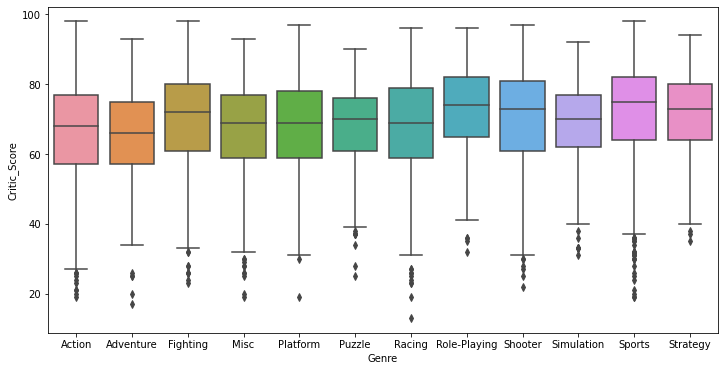

In [16]:
plt.figure(figsize = (12, 6))
sns.boxplot(x="Genre", y="Critic_Score", data=df)
pass


Игры в разных жанрах критики оценивают примерно одинаково.

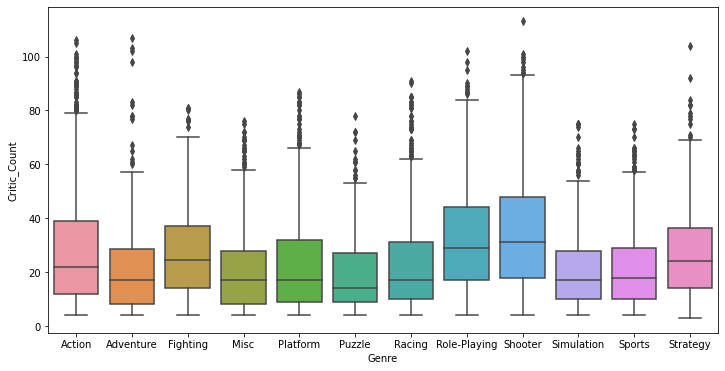

In [17]:
plt.figure(figsize = (12, 6))
sns.boxplot(x="Genre", y="Critic_Count", data=df)
pass

Мода количества оценок у игр в разных жанрах почти одинакова, выделяются, разве что, игры в жанрах Role-Playing и Shooter.

Построим бокс-диаграммы для жанров игры и признака User_Score:

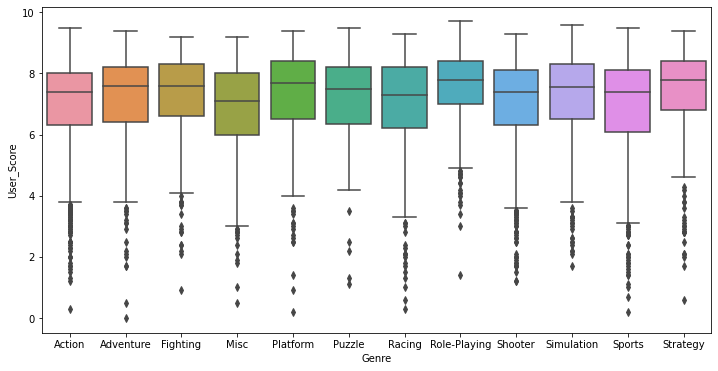

In [18]:
plt.figure(figsize = (12, 6))
sns.boxplot(x="Genre", y="User_Score", data=df)
pass

Игры в разных жанрах пользователи оценивают примерно одинаково.

Для обработки пропущенных знаений в столбцах `Year_of_Release`, `Critic_Score`, `Critic_Count`, `User_Score`, `User_Count`,  было принято решение заполнить их медианными значениями.

In [19]:
df.fillna(df.median(), inplace=True)

In [20]:
df.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             1
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Rating             7164
dtype: int64

Заполним значения в столбцах `Rating` и `Publisher`:

Заполним пропущенные значения в столбце `Rating`, для этого введем новую категорию "NotRated".

In [21]:
df['Rating'] = df['Rating'].cat.add_categories('NotRated')

In [22]:
df['Rating'].fillna('NotRated', inplace=True)


Пропущенное значение в столбце `Publisher` заполним модой.

In [23]:
df['Publisher'].fillna(df['Publisher'].mode().iloc[0], inplace=True)

In [24]:
df.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Rating             0
dtype: int64

### Визуализация и описательная статистика

Сводная информация о количественных признаках:

In [25]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,17416.000000,17416.000000,17416.000000,17416.000000,17416.000000,17416.000000,17416.000000,17416.000000,17416.000000,17416.000000
mean,2006.631488,0.254534,0.140727,0.075020,0.045908,0.516469,70.000861,23.485129,7.328537,86.642742
std,5.900315,0.800673,0.497341,0.303412,0.183932,1.526124,9.717293,13.392226,1.023165,382.776480
min,1976.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.050000,71.000000,21.000000,7.500000,25.000000
50%,2008.000000,0.070000,0.020000,0.000000,0.010000,0.160000,71.000000,21.000000,7.500000,25.000000
75%,2011.000000,0.230000,0.100000,0.030000,0.030000,0.450000,71.000000,21.000000,7.500000,25.000000
max,2017.000000,41.360000,28.960000,10.220000,10.570000,82.540000,98.000000,113.000000,9.700000,10766.000000


Информация о категориальных признаках:

In [26]:
df.describe(include=['category'])

,Platform,Genre,Publisher,Rating
count,17416,17416,17416,17416
unique,31,12,627,9
top,DS,Action,Electronic Arts,NotRated
freq,2251,3503,1381,7164


Построим диаграммы рассеивания для признака `Genre` и признаков `Critic_Score`, `Critic_Count`, `User_Score`, `User_Count`.

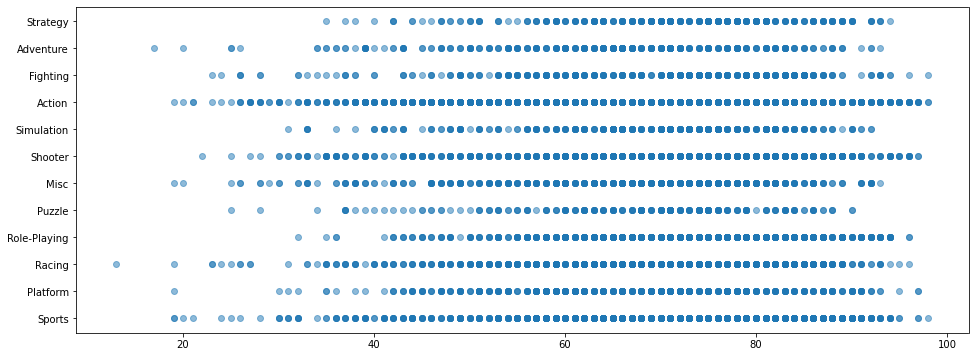

In [27]:
plt.figure(figsize = (16, 6))
plt.scatter(df['Critic_Score'], df['Genre'], alpha=0.5)
pass

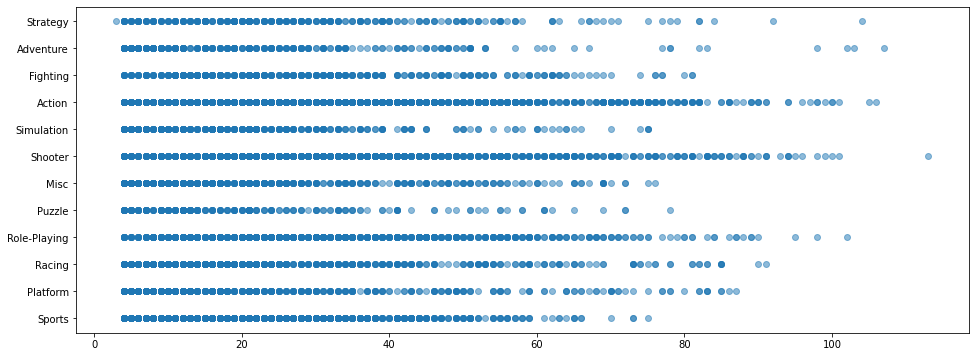

In [28]:
plt.figure(figsize = (16, 6))
plt.scatter(df['Critic_Count'], df['Genre'], alpha=0.5)
pass

Видно, что критики чаще оценивают игры в жанрах Action и Shooter, а игры в жанрах Simulation и Puzzle - реже. Малое количество оценок игр в жанре Puzzle может быть связно с нишевостью этого жанра.

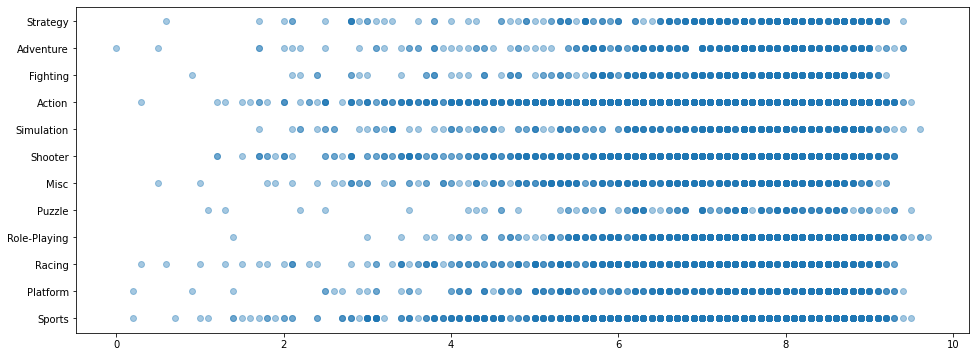

In [29]:
plt.figure(figsize = (16, 6))
plt.scatter(df['User_Score'], df['Genre'], alpha=0.4)
pass

У игр в жанре Puzzle заметно меньше низких оценок от пользователей, чем у игр в других жанрах. По моему мнению данный эффект опять же связан с нишевостью данного жанра, только фанаты этого жанра играют в эти игры и ставят им оценку.

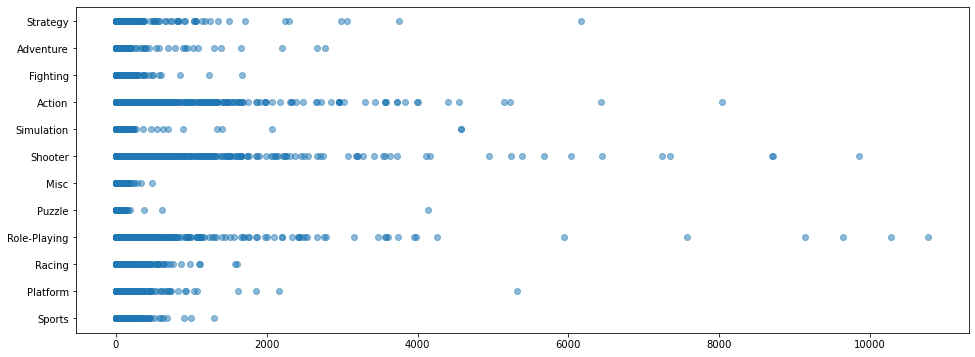

In [30]:
plt.figure(figsize = (16, 6))
plt.scatter(df['User_Count'], df['Genre'], alpha=0.5)
pass

Игры в жанрах Action и Shooter оценивают заметно чаще.

Распределение игр разных жанров:

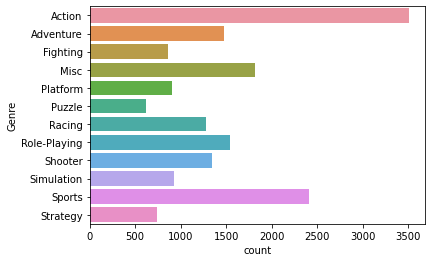

In [31]:
sns.countplot(y ='Genre', data=df)
pass

Видно, что игр в жанре Puzzle заметно меньше, а наибольшее количество игр продано в жанрах Spotrs и Action, что неудивительно, спортивные игры выходят очень часто, а игры в жанре экшен представлены во множестве разновидностей от файтингов, шутеров и платформеров, поэтому очень чато игра позиционируется именно в жанре Action (К экшен-играм может быть отнесена любая игра, где победа над противником обеспечивается благодаря физическому превосходству, например, лучшим прицеливанием или меньшем временем реакции).

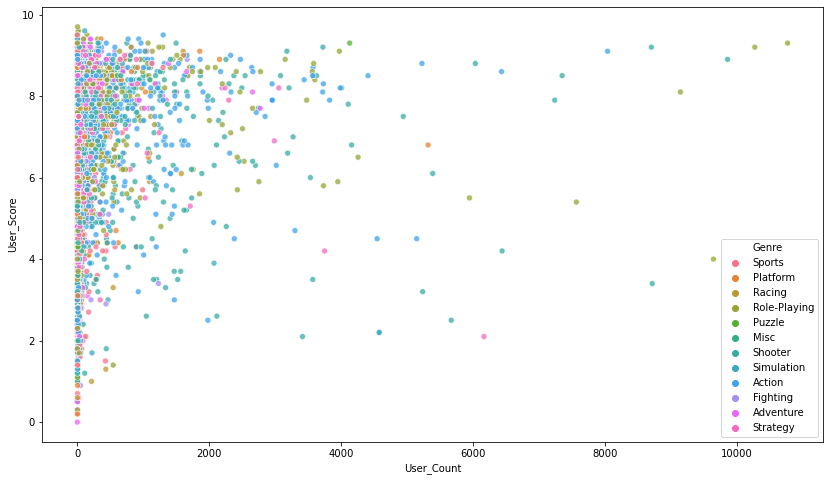

In [32]:
plt.figure(figsize = (14, 8))
sns.scatterplot(x='User_Count', y='User_Score', hue='Genre', data=df, alpha=0.75)
pass

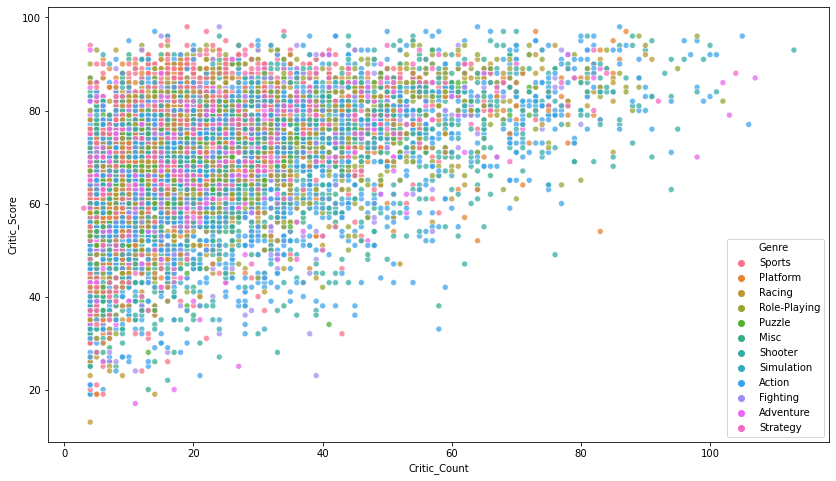

In [33]:
plt.figure(figsize = (14, 8))
sns.scatterplot(x='Critic_Count', y='Critic_Score', hue='Genre', data=df, alpha=0.75)
pass

На двух диаграммах выше видна зависимость количества оценивцших и поставленной оценкой.


Построим все возможные диаграммы рассеивания для каждой пары переменных:

In [34]:
np.random.seed(10)
random_subset = np.random.choice(np.arange(df.shape[0]), size=500, replace=False)

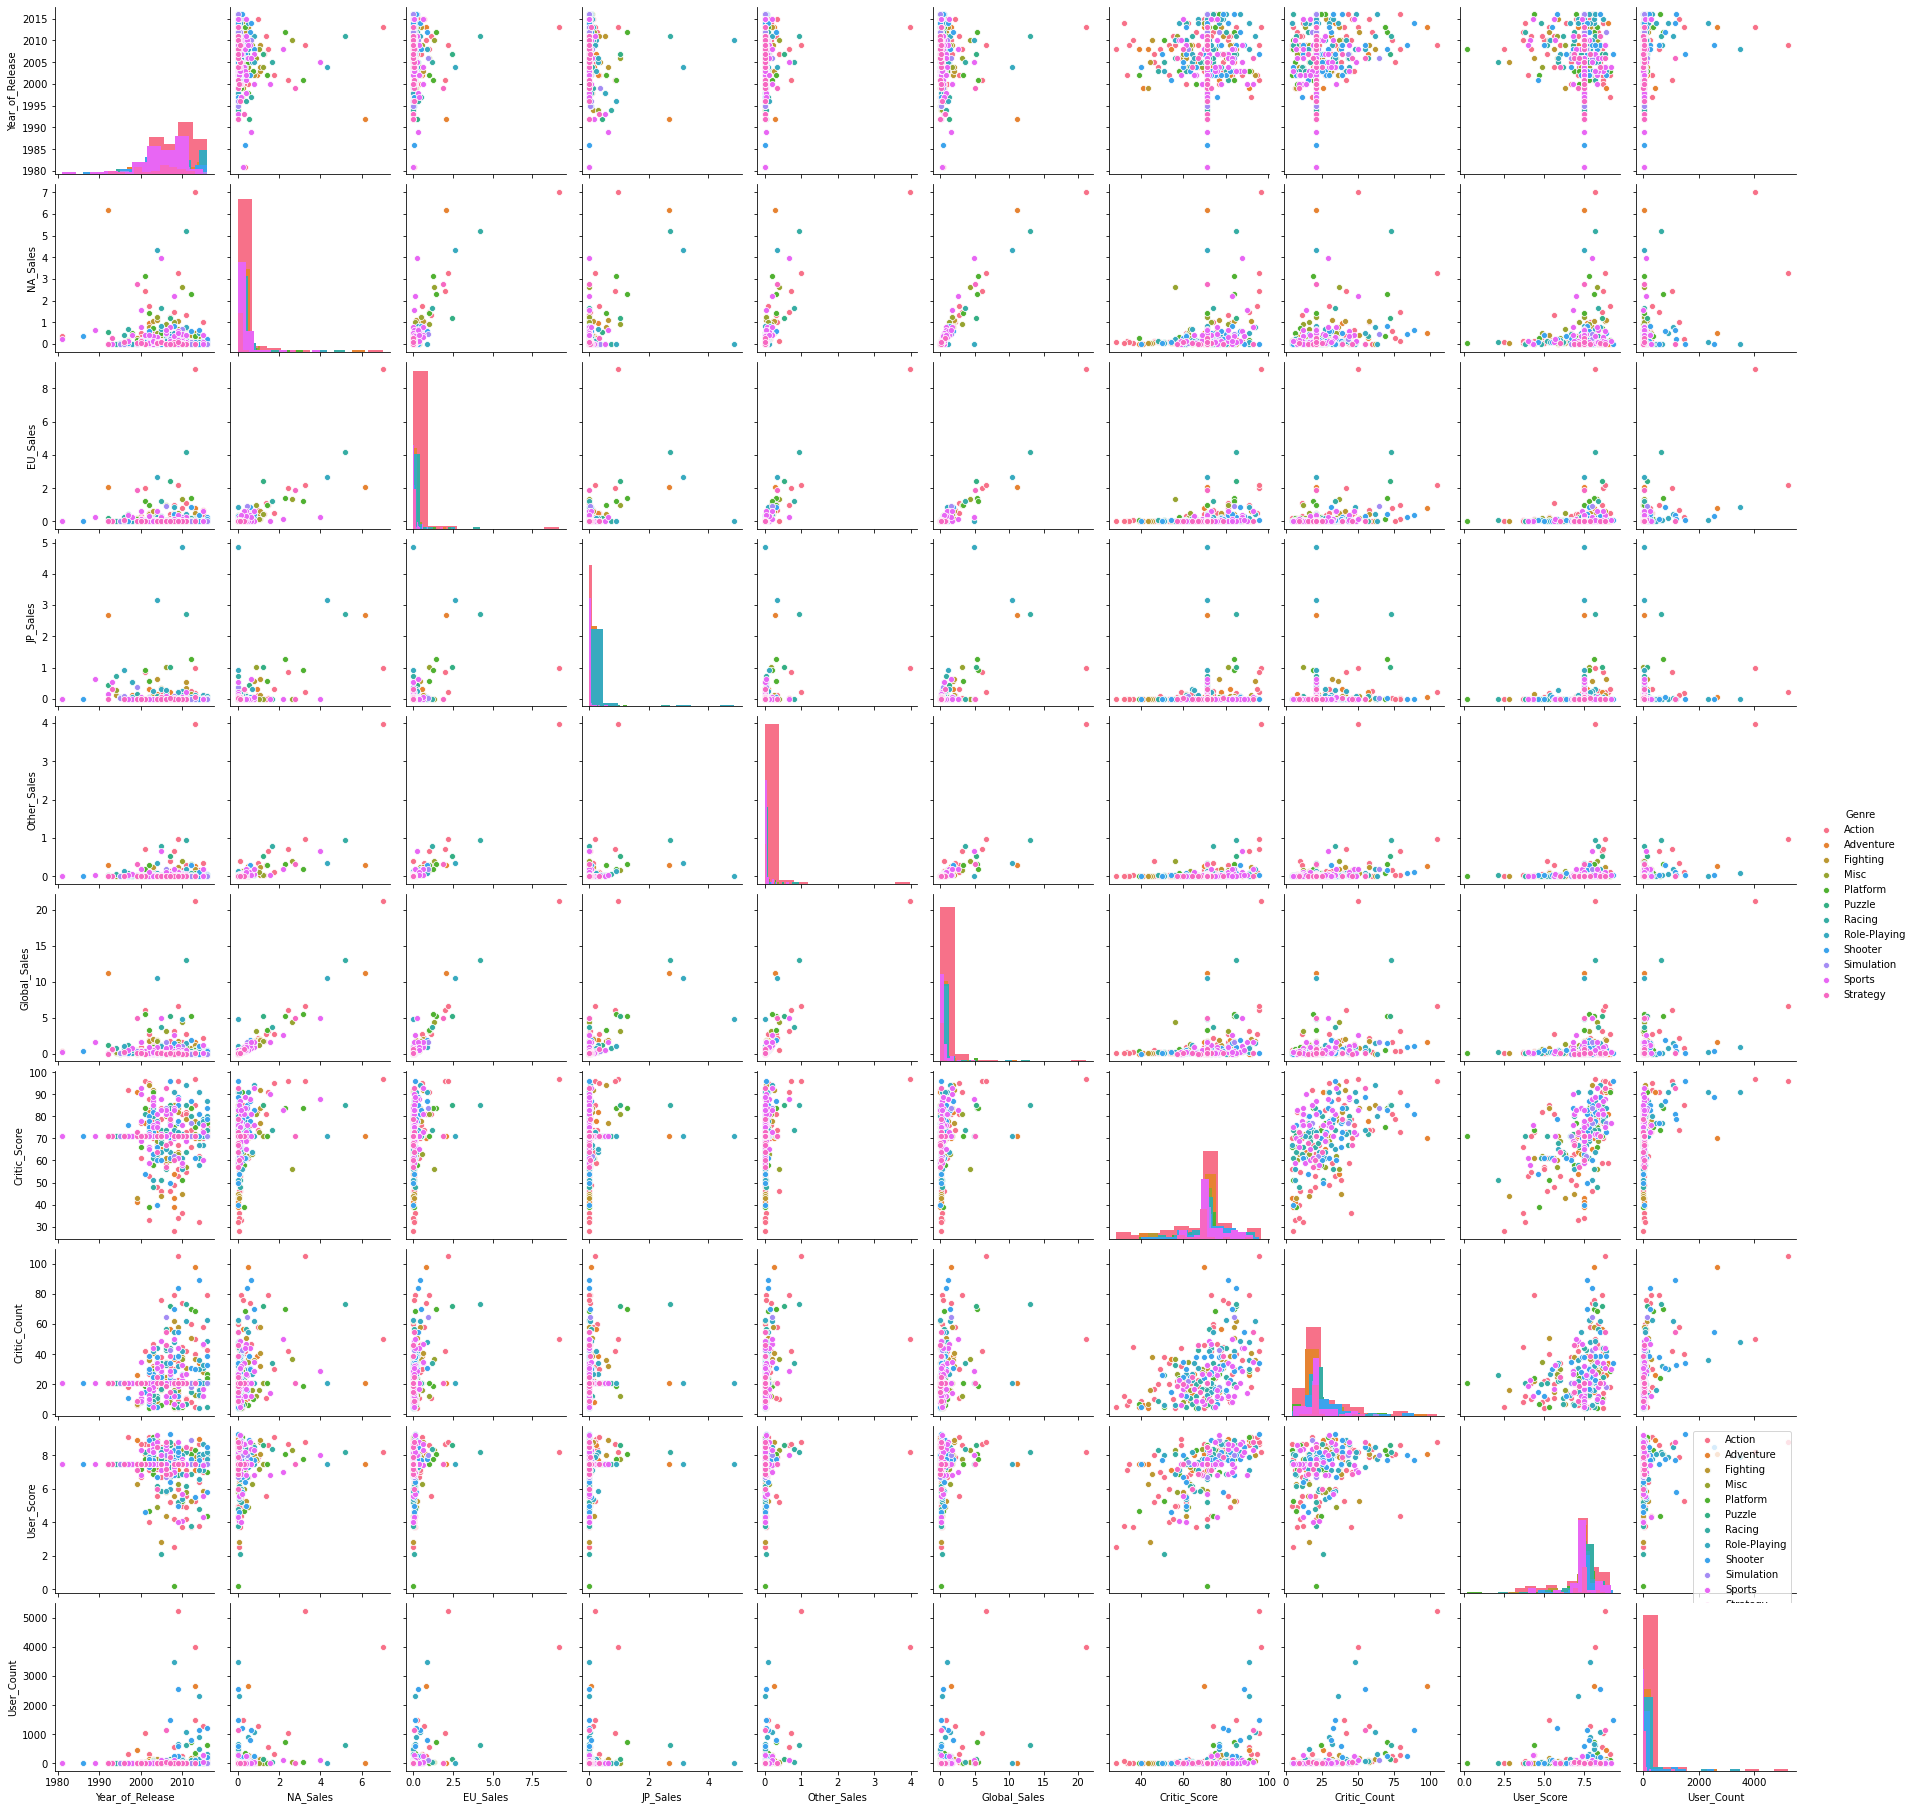

In [35]:
sns.pairplot(df.iloc[random_subset], hue='Genre', diag_kind='hist')
plt.legend()
pass

Тут мы наблюдаем корреляцию между продажами во всем мире и продажами в Северной Америке, Европе, и глобальными продажами, что неудивительно.

Диаграмма рассеивания для года издания игры и жанра в котором она была выпущена:

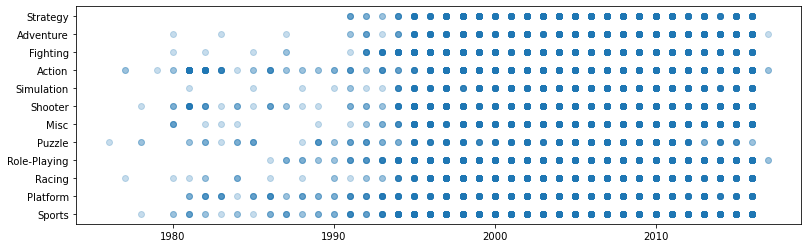

In [36]:
plt.figure(figsize = (13, 4))
plt.scatter(df['Year_of_Release'], df['Genre'], alpha=0.25)
pass

Диаграмма рассеивания для жанра игры и платформы на которй она была выпущена:

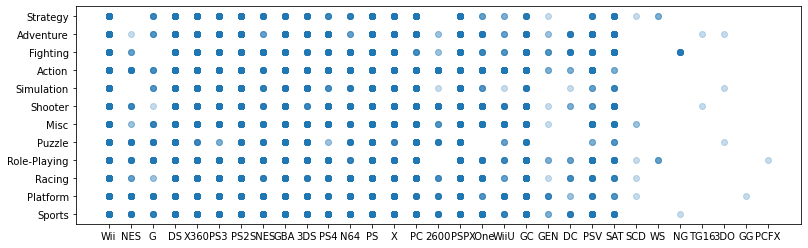

In [37]:
plt.figure(figsize = (13, 4))
plt.scatter(df['Platform'], df['Genre'], alpha=0.25)
pass

Для некоторых платформ не популярны игры в определенных жанрах или наоборот(например для XOne игры в жанре Puzzle, а для NG (Nokia N-Gage) продажи выше 100000 копий были только у файтингов и спортивных игр).

In [38]:
corr_mat = df.corr()
corr_mat

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,1.000000,-0.097025,0.000772,-0.166256,0.033822,-0.079659,-0.005113,0.123002,-0.159150,0.113551
NA_Sales,-0.097025,1.000000,0.765520,0.451668,0.640798,0.941072,0.172196,0.247257,0.039712,0.210297
EU_Sales,0.000772,0.765520,1.000000,0.436560,0.725495,0.901681,0.179440,0.267084,0.019722,0.273593
JP_Sales,-0.166256,0.451668,0.436560,1.000000,0.293111,0.613325,0.097801,0.095112,0.083250,0.036395
Other_Sales,0.033822,0.640798,0.725495,0.293111,1.000000,0.751348,0.169366,0.258765,0.022147,0.250224
Global_Sales,-0.079659,0.941072,0.901681,0.613325,0.751348,1.000000,0.188619,0.266789,0.046470,0.236835
Critic_Score,-0.005113,0.172196,0.179440,0.097801,0.169366,0.188619,1.000000,0.392891,0.478642,0.241525
Critic_Count,0.123002,0.247257,0.267084,0.095112,0.258765,0.266789,0.392891,1.000000,0.118295,0.387555
User_Score,-0.159150,0.039712,0.019722,0.083250,0.022147,0.046470,0.478642,0.118295,1.000000,-0.006164
User_Count,0.113551,0.210297,0.273593,0.036395,0.250224,0.236835,0.241525,0.387555,-0.006164,1.000000


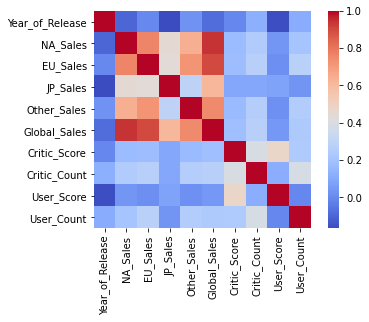

In [39]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Видим, что существует корреляция между оценкой пользователей и критиков, а так же, что продажи во всем мире и разных регионах коррелируют между собой.

### Бинаризация номинальных признаков

In [40]:
Genre_dummies_1 = pd.get_dummies(df['Publisher'])

In [41]:
Genre_dummies_2 = pd.get_dummies(df['Platform'])

In [42]:
Genre_dummies_3 = pd.get_dummies(df['Rating'])

In [43]:
df = pd.concat((df, Genre_dummies_1), axis=1)
df = df.drop(['Publisher'], axis=1)

In [44]:
df = pd.concat((df, Genre_dummies_2), axis=1)
df = df.drop(['Platform'], axis=1)

In [45]:
df = pd.concat((df, Genre_dummies_3), axis=1)
df = df.drop(['Rating'], axis=1)

In [46]:
df.head()

,Name,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,...,XOne,AO,E,E10+,EC,K-A,M,RP,T,NotRated
0,Wii Sports,2006.0,Sports,41.36,28.96,3.77,8.45,82.54,76.0,51.0,...,0,0,1,0,0,0,0,0,0,0
1,Super Mario Bros.,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,71.0,21.0,...,0,0,0,0,0,0,0,0,0,1
2,Mario Kart Wii,2008.0,Racing,15.68,12.80,3.79,3.29,35.57,82.0,73.0,...,0,0,1,0,0,0,0,0,0,0
3,Wii Sports Resort,2009.0,Sports,15.61,10.95,3.28,2.95,32.78,80.0,73.0,...,0,0,1,0,0,0,0,0,0,0
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37,71.0,21.0,...,0,0,0,0,0,0,0,0,0,1


### Отбор признаков

Признак Name не несет никакой содержательной информации для решаемой задачи, поэтому его можно исключить из тренировочной и тестовой выборок.

In [47]:
df = df.drop('Name', axis = 1)

Так как данные о глобальных продажах коррелируют с данными о продажах в Северной Америке, Европе, Японии и других странах, исключим их тоже:

In [48]:
df = df.drop('Global_Sales', axis = 1)

### Нормализация признаков и разбиение на выборки

In [49]:
y = df['Genre']
X = df.drop('Genre', axis = 1)

In [50]:
print("x:", X.shape)
print("y:", y.shape)

x: (17416, 676)
y: (17416,)


In [51]:
X = (X - X.mean(axis = 0))/X.std(axis = 0)

In [52]:
X.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,10TACLE Studios,...,XOne,AO,E,E10+,EC,K-A,M,RP,T,NotRated
count,1.741600e+04,1.741600e+04,1.741600e+04,1.741600e+04,1.741600e+04,1.741600e+04,1.741600e+04,1.741600e+04,1.741600e+04,1.741600e+04,...,1.741600e+04,1.741600e+04,1.741600e+04,1.741600e+04,1.741600e+04,1.741600e+04,1.741600e+04,1.741600e+04,1.741600e+04,1.741600e+04
mean,1.255044e-14,-8.321547e-15,-5.891515e-14,7.079841e-14,1.937969e-14,1.351314e-14,3.239064e-14,-3.971517e-14,-9.161472e-15,1.239624e-15,...,6.349075e-15,-2.360302e-15,-1.407642e-15,-1.152656e-14,-2.716113e-17,1.022625e-15,2.858397e-14,1.346120e-15,-5.392901e-15,3.216602e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.191500e+00,-3.179007e-01,-2.829589e-01,-2.472529e-01,-2.495940e-01,-5.865920e+00,-1.529628e+00,-7.162612e+00,-2.159034e-01,-1.312536e-02,...,-1.240601e-01,-7.577497e-03,-5.566416e-01,-3.039512e-01,-2.143671e-02,-1.312536e-02,-3.179433e-01,-1.312536e-02,-4.602965e-01,-8.359129e-01
25%,-6.154736e-01,-3.179007e-01,-2.829589e-01,-2.472529e-01,-2.495940e-01,1.028207e-01,-1.855650e-01,1.675809e-01,-1.610411e-01,-1.312536e-02,...,-1.240601e-01,-7.577497e-03,-5.566416e-01,-3.039512e-01,-2.143671e-02,-1.312536e-02,-3.179433e-01,-1.312536e-02,-4.602965e-01,-8.359129e-01
50%,2.319388e-01,-2.304742e-01,-2.427450e-01,-2.472529e-01,-1.952261e-01,1.028207e-01,-1.855650e-01,1.675809e-01,-1.610411e-01,-1.312536e-02,...,-1.240601e-01,-7.577497e-03,-5.566416e-01,-3.039512e-01,-2.143671e-02,-1.312536e-02,-3.179433e-01,-1.312536e-02,-4.602965e-01,-8.359129e-01
75%,7.403862e-01,-3.064216e-02,-8.188940e-02,-1.483775e-01,-8.649036e-02,1.028207e-01,-1.855650e-01,1.675809e-01,-1.610411e-01,-1.312536e-02,...,-1.240601e-01,-7.577497e-03,-5.566416e-01,-3.039512e-01,-2.143671e-02,-1.312536e-02,-3.179433e-01,-1.312536e-02,-4.602965e-01,1.196228e+00
max,1.757281e+00,5.133867e+01,5.794676e+01,3.343630e+01,5.721724e+01,2.881372e+00,6.684092e+00,2.317771e+00,2.789972e+01,7.618399e+01,...,8.060147e+00,1.319621e+02,1.796385e+00,3.289813e+00,4.664628e+01,7.618399e+01,3.145034e+00,7.618399e+01,2.172388e+00,1.196228e+00


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

13062 4354


In [54]:
from sklearn.neighbors import KNeighborsClassifier
neighbors_array = np.array([1,5,10,15,20,50])
for i in range (6):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_train, y_train)
    print('neighbours =',neighbors_array[i],'train accuracy =',knn.score(X_train, y_train),'test accuracy =', knn.score(X_test, y_test))
    i+=1

neighbours = 1 train accuracy = 0.9820854386770785 test accuracy = 0.35714285714285715
neighbours = 5 train accuracy = 0.5624712907671107 test accuracy = 0.3803399173174093
neighbours = 10 train accuracy = 0.49257387842596845 test accuracy = 0.37643546164446484
neighbours = 15 train accuracy = 0.4526106262440668 test accuracy = 0.37436839687643547
neighbours = 20 train accuracy = 0.4372224774154035 test accuracy = 0.3679375287092329
neighbours = 50 train accuracy = 0.3703108252947481 test accuracy = 0.34152503445107946


kNN метод показывает самую высокую точность на обучаещей выборке для 1 соседа. С увеличением количества соседей точность на обучающей выборке падает, а на тестовой самая высокая точность была достигнута при 5 соседях, а затем с увеличением количества соседей начинает падать.

In [56]:
from sklearn.ensemble import RandomForestClassifier
trees_array = np.array([10,25,50,100,200])
for i in range (5):
    rfc = RandomForestClassifier(n_estimators = trees_array[i])
    rfc.fit(X_train, y_train)
    print('trees =',trees_array[i],'train accuracy =',rfc.score(X_train, y_train),'test accuracy =', rfc.score(X_test, y_test))
    i+=1

trees = 10 train accuracy = 0.967156637574644 test accuracy = 0.38654111162149746
trees = 25 train accuracy = 0.9820088807227071 test accuracy = 0.41249425815342217
trees = 50 train accuracy = 0.9828510182207931 test accuracy = 0.41616903996325216
trees = 100 train accuracy = 0.9828510182207931 test accuracy = 0.41961414790996787
trees = 200 train accuracy = 0.9828510182207931 test accuracy = 0.41754708314193845


Метод RandomForest показа на тренировочной выборке точность в 98%, на тестовой выборке была достигнута точность 42%.

### Вывод

Метод kNN работал намного медленнее RF и показал меньшую точность.